# Help NGO- Clustering assignment

### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Goals and Objectives

To categorise the countries using some socio-economic and health factors that determine the overall development of the country.
To suggest the countries which the CEO needs to focus on the most.

### Importing required libraries

In [1]:
#importing warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and Understanding the data

In [3]:
#Read the dataset

country_data=pd.read_csv('Country-data.csv')

In [4]:
#head of the dataset
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data.country.value_counts()

Canada           1
Slovenia         1
Malta            1
Mali             1
Malawi           1
                ..
Guinea-Bissau    1
Armenia          1
Cote d'Ivoire    1
Samoa            1
Bahamas          1
Name: country, Length: 167, dtype: int64

In [6]:
#tail of the dataset
country_data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [7]:
#dataset info

country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


`All the columns are having expected data types.No need to change the datatype`

### Data Cleaning

In [8]:
country_data.isnull().sum() #Checking whether there are any null values in the dataset

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
#Printing all the unique countries to check for any spelling mistakes
print(country_data['country'].value_counts())

Canada           1
Slovenia         1
Malta            1
Mali             1
Malawi           1
                ..
Guinea-Bissau    1
Armenia          1
Cote d'Ivoire    1
Samoa            1
Bahamas          1
Name: country, Length: 167, dtype: int64


### Data Transformation
#### Let's change the 'health', 'imports' and 'exports' column values to normal values since they are in percentages of Total GDP.

In [10]:
country_data['exports'] = (country_data['exports']*country_data['gdpp'])/100

country_data['health'] = (country_data['health']*country_data['gdpp'])/100

country_data['imports'] = (country_data['imports']*country_data['gdpp'])/100

In [11]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Visualisation

### Univariate Analysis

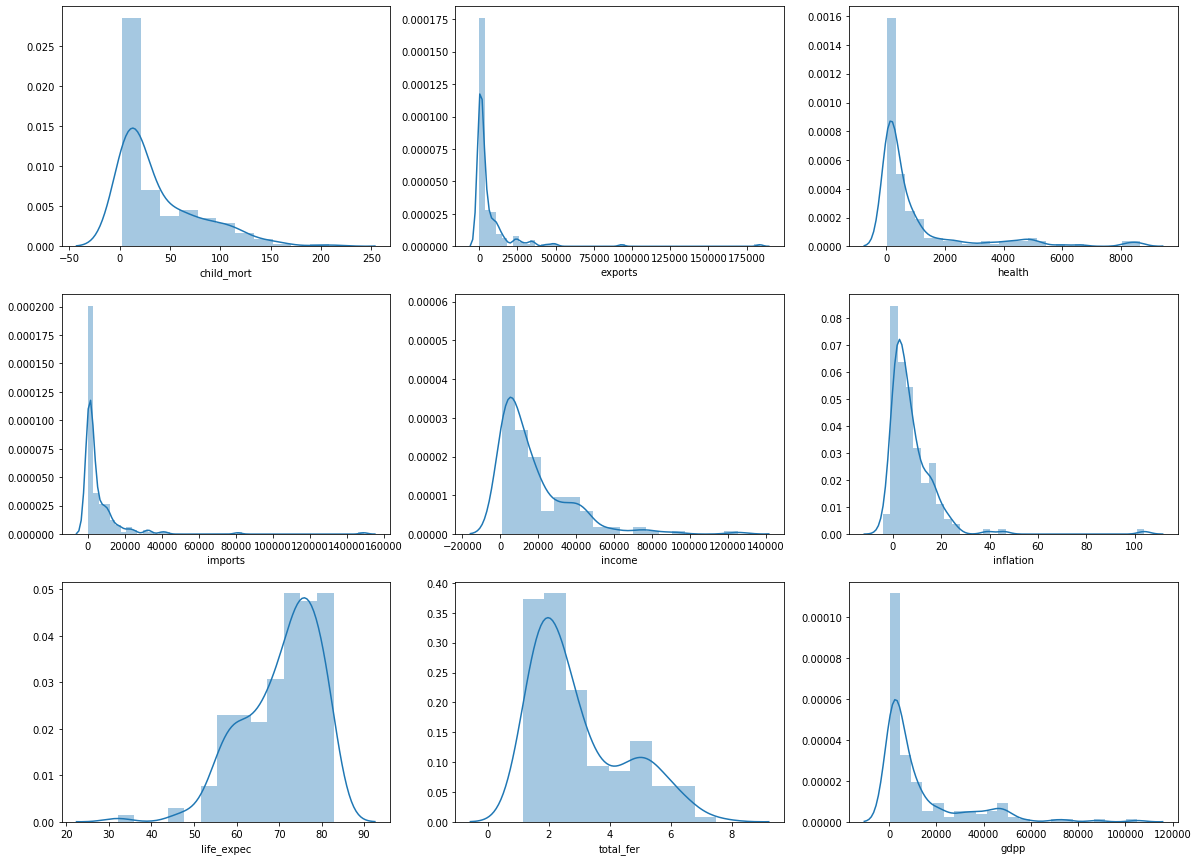

In [12]:
plt.figure(figsize = (20,15))
f = country_data.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_data[i[1]])

<b>Analysis:</b>
- Inflation, health, child_mort, imports ,exports, inflation are normally distributed 
- High values of child mort rate are concentrated approximately between 0 and 25
- Values of gdpp are concentrated between 0 and 20000 and also between 40000 and 60000
- Total fertility column values are concentrated more between 1 and 3.8 and also between above 4 and 6
- Most of the countries income are ranging between 0-20000 and also between 30000-50000

### Bivariate Analysis

#### Correlation

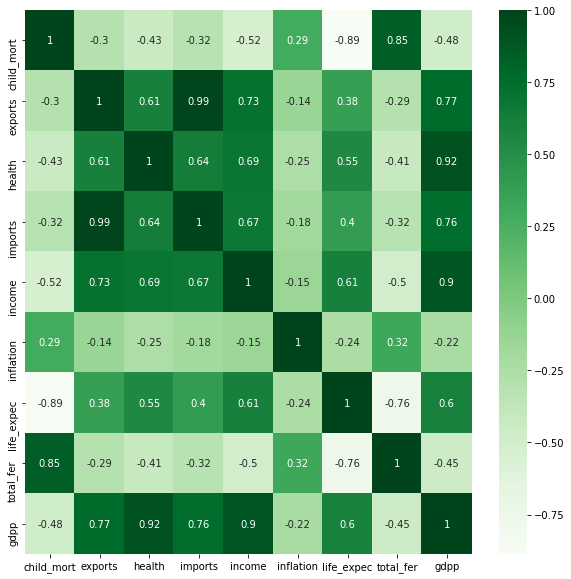

In [13]:
#Let's draw a heatmap for the numerical attributes to check correlation among them
features=['child_mort','exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (10,10))
fig=sns.heatmap(country_data[features].corr(),annot=True,cmap='Greens')
plt.show()

#### Observations
There is more positive correlation 
- between imports and exports is the highest which is 0.99
- between health and gdpp it is 0.92
- between income and gdpp it is 0.9
- between child_mort and total_fer it is 0.85

There is more negative correlation 
- between child_mort and life_expec is the lowest which is -0.89
- between life_expec and total_fer it is -0.76

<Figure size 288x288 with 0 Axes>

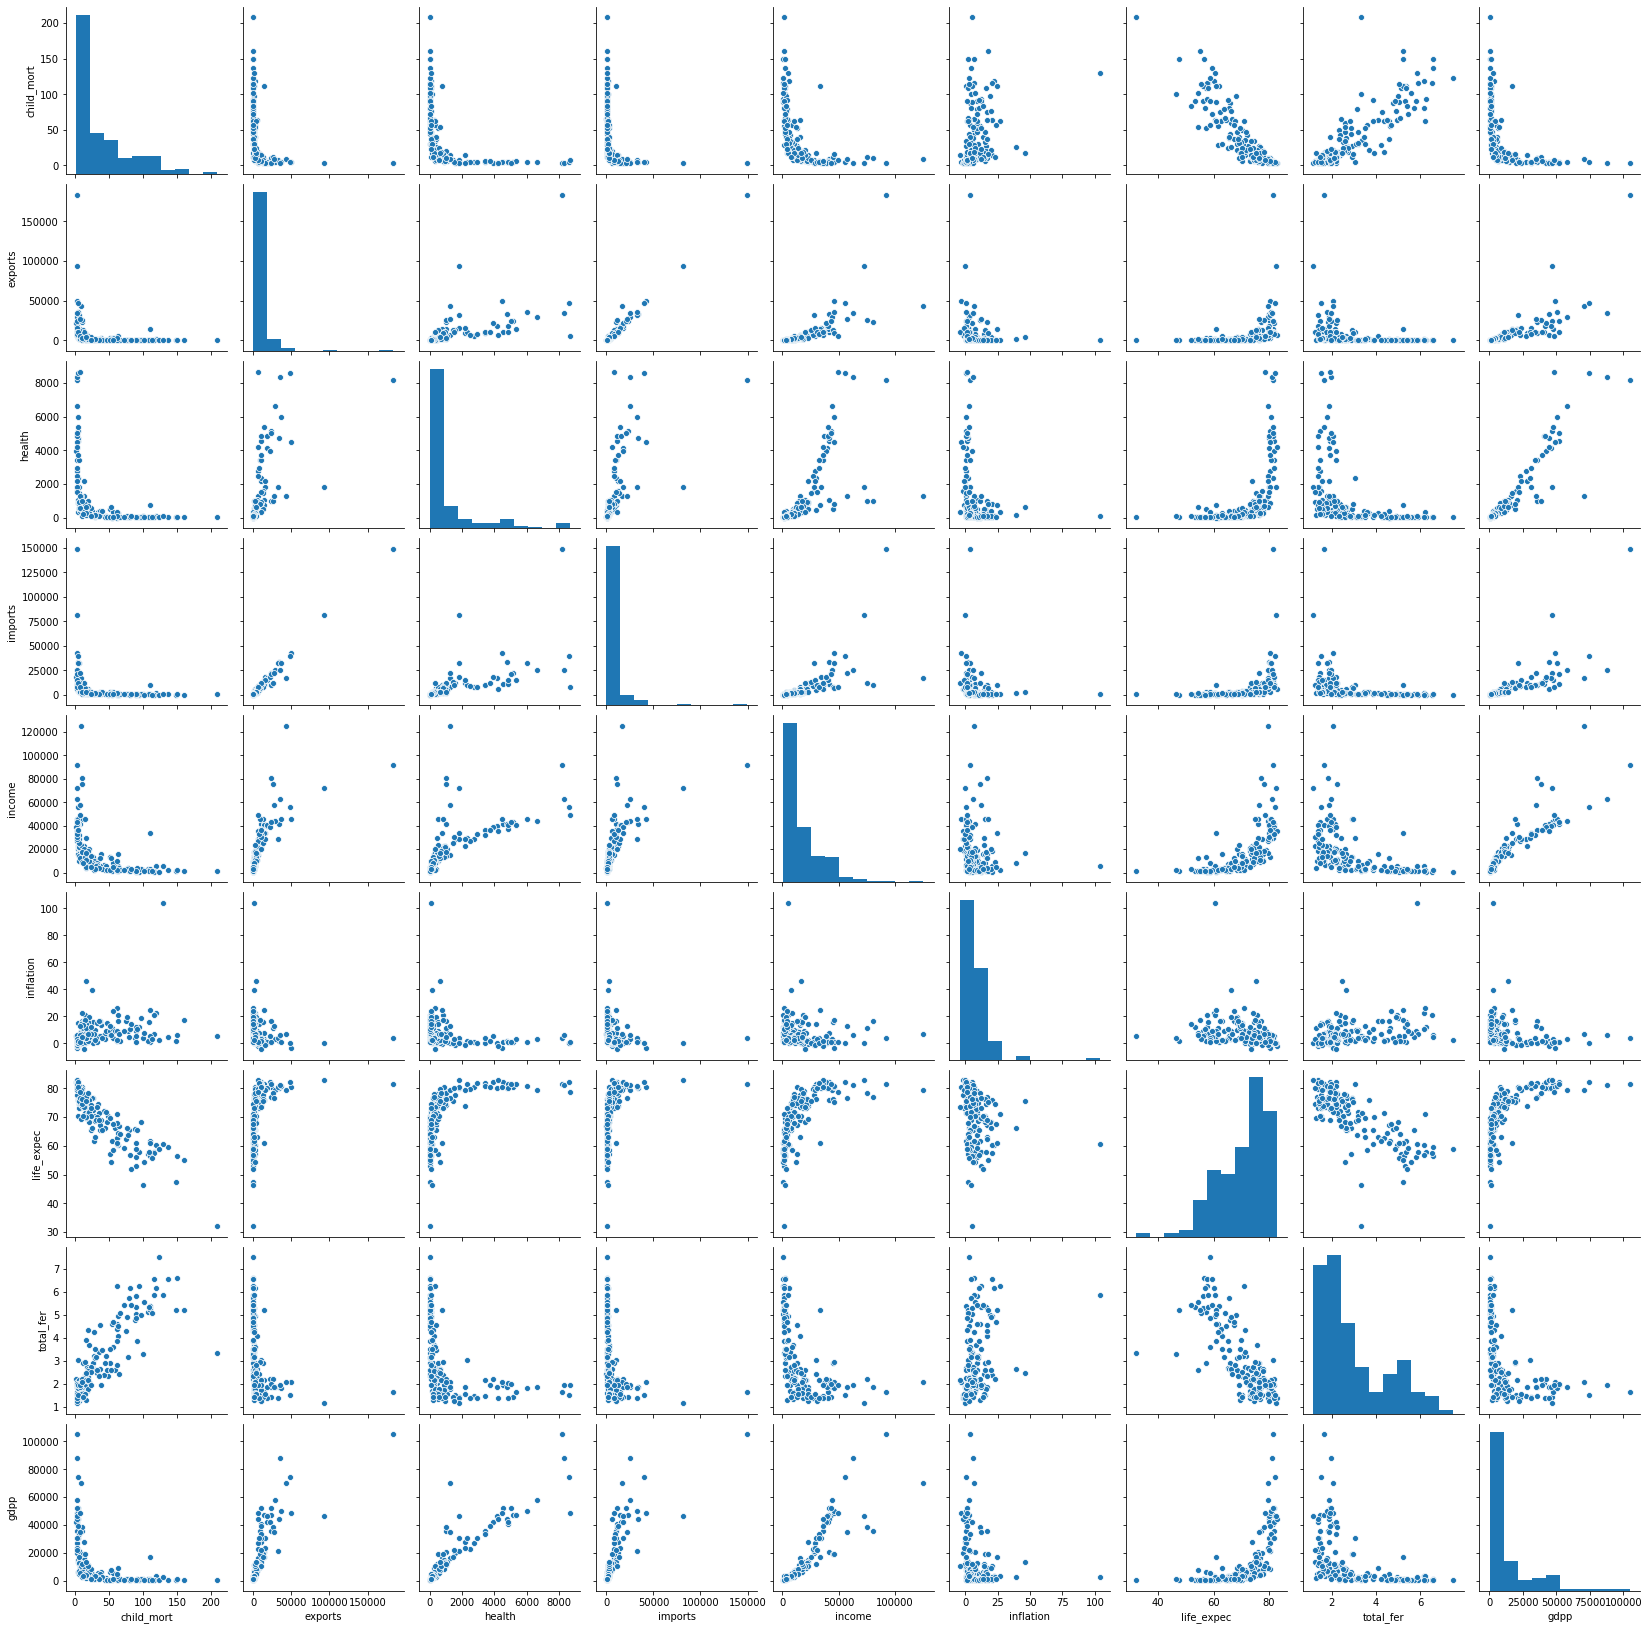

In [14]:
#pairplot of all numerical variables to check the distribution of data 
plt.figure(figsize = (4,4))
sns.pairplot(country_data)
plt.show()

From the above pair plot, 
- We can see that the health and gdpp are positively correlated with each other
- Also, exports and imports are also positively correlated with each other


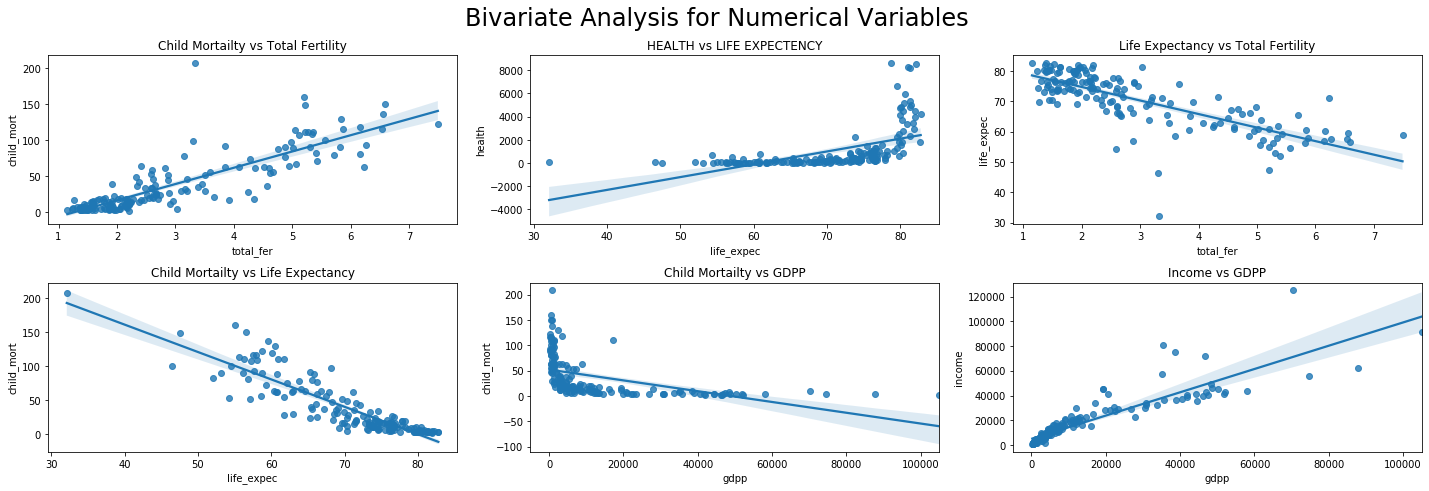

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.title('Child Mortailty vs Total Fertility',fontsize=12)
sns.regplot(y='child_mort',x='total_fer', data=country_data)
plt.subplot(332)
plt.title('HEALTH vs LIFE EXPECTENCY',fontsize=12)
sns.regplot(y='health',x='life_expec', data=country_data)
plt.subplot(333)
plt.title('Life Expectancy vs Total Fertility',fontsize=12)
sns.regplot(y='life_expec',x='total_fer', data=country_data)
plt.subplot(334)
plt.title('Child Mortailty vs Life Expectancy',fontsize=12)
sns.regplot(y='child_mort',x='life_expec', data=country_data)
plt.subplot(335)
plt.title('Child Mortailty vs GDPP',fontsize=12)
sns.regplot(y='child_mort',x='gdpp', data=country_data)
plt.subplot(336)
plt.title('Income vs GDPP',fontsize=12)
sns.regplot(y='income',x='gdpp', data=country_data)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Bivariate Analysis for Numerical Variables',fontsize=24)
plt.show()

Observations:
- From the above plot, it is evident that there is high negative correlation between life expectancy and total fertility and child mortality and life expectancy
- There is more positive correlation between total fertility and child mortality and also between gdpp and income

## Outlier Treatment

In [16]:
#checking the percentiles
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


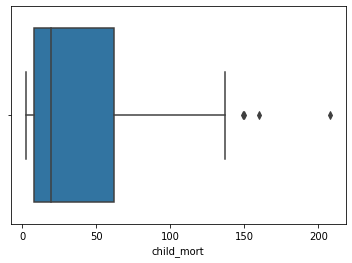

In [17]:
#Lets check the boxplot for child_mort,inflation,total fertility as the difference between 99 percentile and max 
#is more when compared to other features
sns.boxplot(country_data.child_mort)
plt.show()

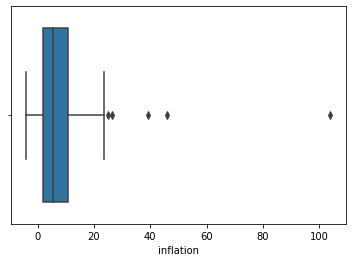

In [18]:
sns.boxplot(country_data.inflation)
plt.show()

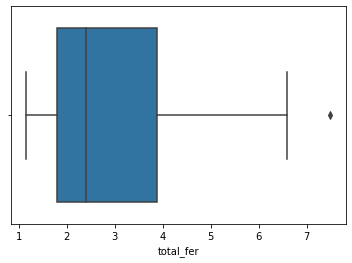

In [19]:
sns.boxplot(country_data.total_fer)
plt.show()

We can see outliers on the upper side of the data in child mortality,inflation and total_fertility columns.We are not handling the outliers here beacuse all of them have outlier on the upper end of the boxplot. Based on the requirement we cannot cap or remove the outliers in this case as there can be loss of information.Lets check for rest of the variables

In [20]:
country_features=['health' ,'imports', 'income' ,'exports', 'life_expec', 'gdpp']

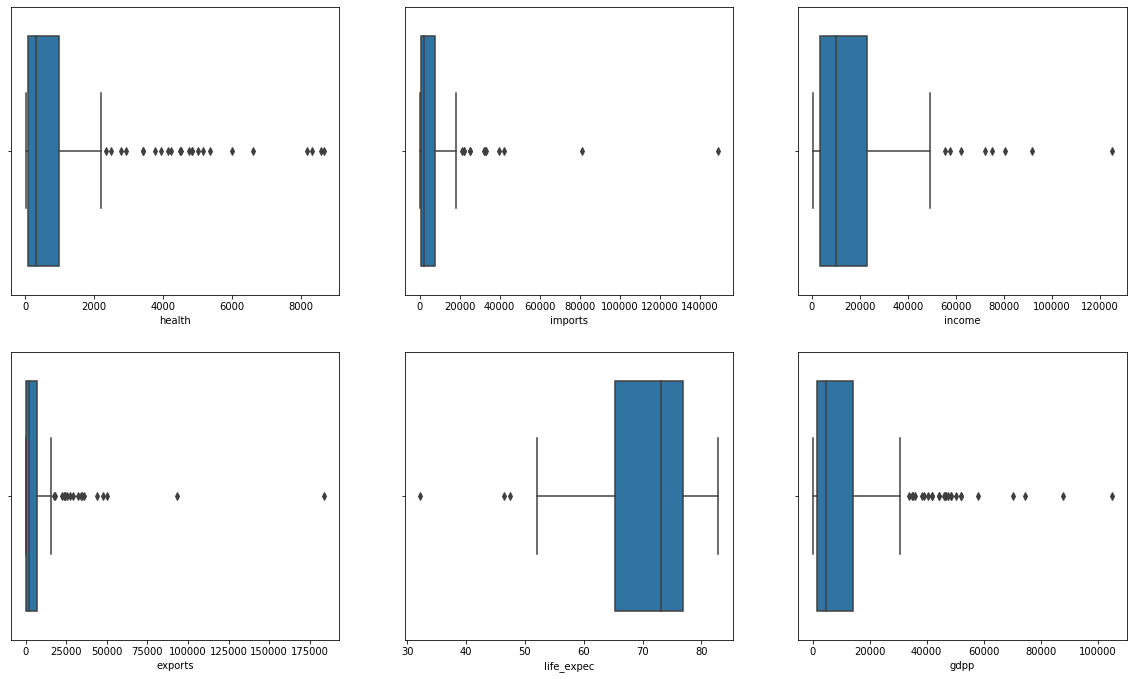

In [21]:
plt.figure(figsize = (20,18))
for i in enumerate(country_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =country_data)

Analysis
- There are outliers on the lower end of the box plot for life_expec feature but for rest of the features the outliers are on the upper side.
- Now let us perform softcapping on the features which has outliers on the upper side of the box plot.
- Here , we will be replacing the values above 99 percentitle with 99th percentile value.

In [22]:
q2_health=country_data['health'].quantile(0.99)
q2_imports=country_data['imports'].quantile(0.99)
q2_income=country_data['income'].quantile(0.99)
q2_exports=country_data['exports'].quantile(0.99)
q2_gdpp=country_data['gdpp'].quantile(0.99)

#Soft capping of the features

country_data['health'][country_data['health']>=q2_health] =q2_health
country_data['imports'][country_data['imports']>=q2_imports] =q2_imports
country_data['income'][country_data['income']>=q2_income] =q2_income
country_data['exports'][country_data['exports']>=q2_income] =q2_exports
country_data['gdpp'][country_data['gdpp']>=q2_gdpp] =q2_gdpp

In [23]:
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,55136.308400,8352.982736,46629.102600,81883.160000,41.478000,82.370000,6.563600,76125.920000


In [24]:
country_data.shape

(167, 10)

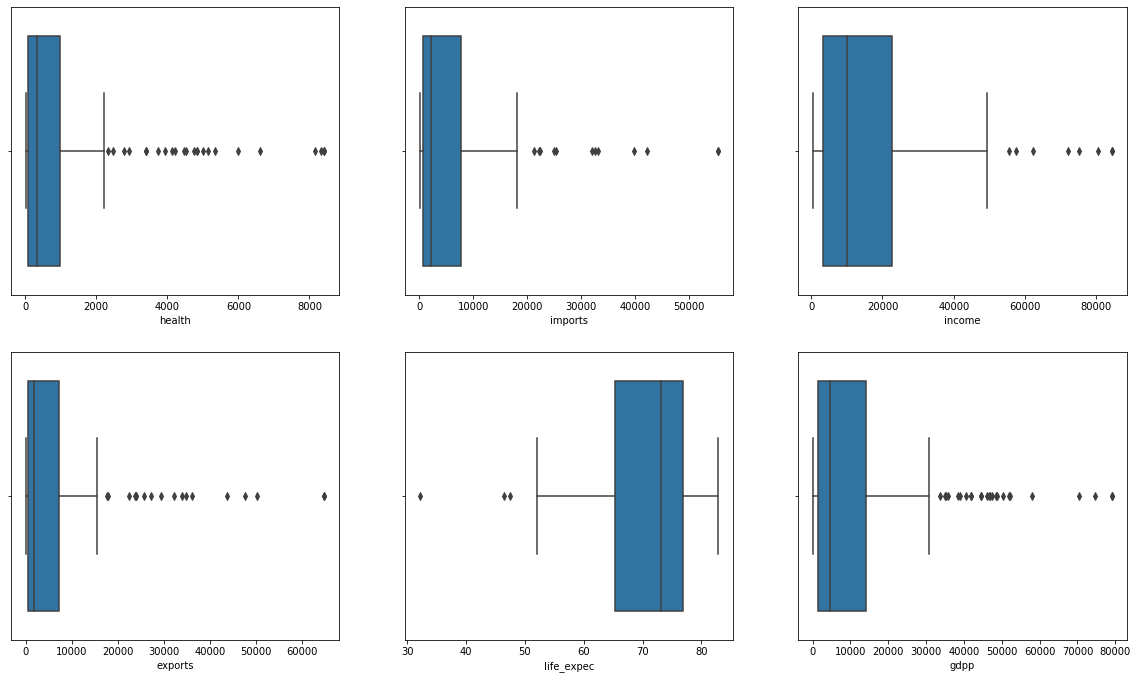

In [25]:
plt.figure(figsize = (20,18))
for i in enumerate(country_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =country_data)

### Hopkins

In [26]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
# Hopkins statistic is calculated to know how different your data is from randomly scattered data
hopkins(country_data.drop('country', axis = 1))

0.9203530481883179

`Based on the Hopkins statistic, we can conclude that this data is good for clustering`

### Scaling the data

In [28]:
##standardise all numerical features since to have a same scale for all the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = ss.fit_transform(country_data.drop("country", axis=1))
df

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [29]:
df = pd.DataFrame(df)
df.columns = f
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


# Method 1: KMeans Clustering

## SSD and SILHOUETTE for best value of K

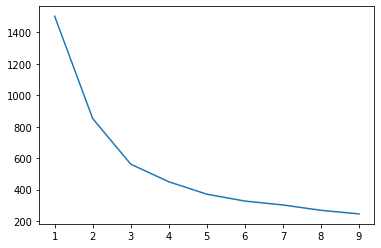

In [30]:
# Finding Optimal number of clusters.
# Elbow Curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

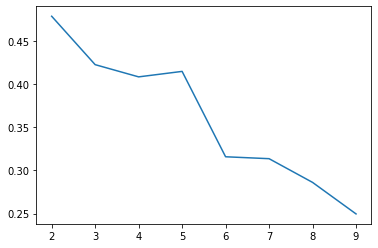

In [31]:
#Now, lets calculate the silhouette score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df)
    ss.append([k, silhouette_score(df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

## Optimal Score of k is 3

In [32]:
# Initialising K value
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [33]:
#Kmeans Labels
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [34]:
cluster_labels=kmeans.labels_

In [35]:
# Now, we will assign these labels to the orignial dataframe.
df_km = pd.concat([country_data], axis = 1)
df_km.head()
df_km['labels'] = kmeans.labels_

In [36]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [37]:
#Value_counts for different clusters
df_km.labels.value_counts()

2    92
0    48
1    27
Name: labels, dtype: int64

## K Means Clustering Visualisation

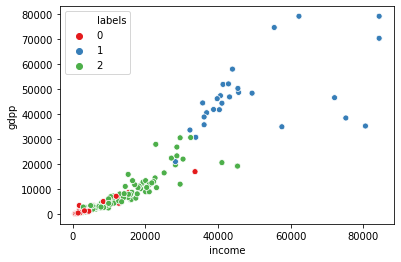

In [38]:
#visualising scatter plot between income and gdpp
sns.scatterplot(x = 'income', y = 'gdpp', hue ='labels', legend = 'full', data = df_km, palette='Set1')
plt.show()

In the above plot, we can see that the highest income and highest gdpp belongs to cluster 1

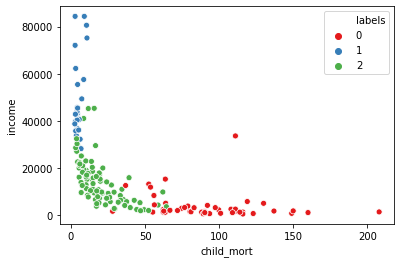

In [39]:
#visualising scatter plot between child mortality and income
sns.scatterplot(x = 'child_mort', y = 'income', hue ='labels', legend = 'full', data = df_km, palette='Set1')
plt.show()

From the above plot, it can be seen that cluster 0 is concentrated with low income and high child mortality rate

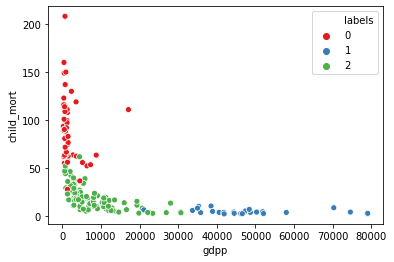

In [40]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='labels', legend = 'full', data = df_km, palette='Set1')
plt.show()

From the above plot, it is evident that cluster label 0 is having high child mortality rate and low gdpp

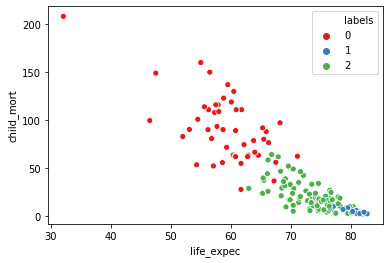

In [41]:
#scatter plot between life_expec and child_mort to understand how clusters are distributed
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='labels', legend = 'full', data = df_km, palette='Set1')
plt.show()

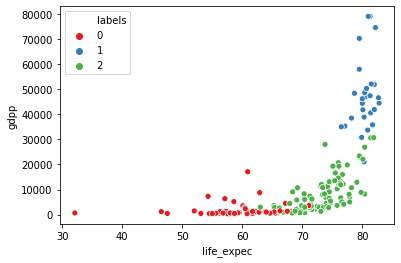

In [42]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='labels', legend = 'full', data = df_km, palette='Set1')
plt.show()

From the above plot it can be seen that the more life expectancy and high gdpp belongs to cluster '1' 

### KMeans Cluster Profiling

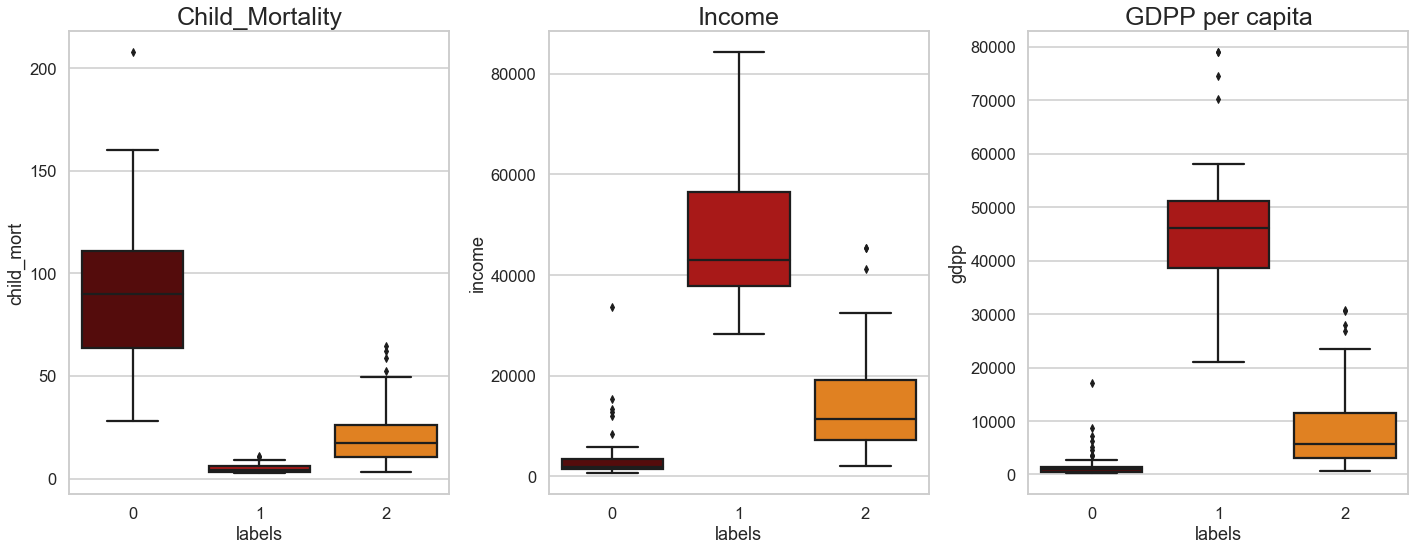

In [43]:
#box plots for child mortality,gdpp and income to understand the cluster profiling
plt.figure(figsize=(20,8))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Visualising with boxplot for child_mort, income and gdpp variables 
plt.subplot(1,3,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot
sns.boxplot(x=df_km['labels'],y=df_km['child_mort'],data=df_km,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(1,3,2)                         
plt.title('Income',fontsize=25)           

# creating boxplot
sns.boxplot(x=df_km['labels'],y=df_km['income'],data=df_km,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(1,3,3)                           
plt.title('GDPP per capita',fontsize=25)       

# creating boxplot
sns.boxplot(x=df_km['labels'],y=df_km['gdpp'],data=df_km,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual

### Observations from above plots
- Label 0 has more child_mort and 0 income and 0 GDPP per capita
- Label 1 has very minimal child_mort and high income and high GDPP
- Lable 2 has child_mortality ranging between 0 and 50 and even income and GDPP is in medium level compared to other 2 cases

In [44]:
#Finding the observations that belong to Label 0
df_km[df_km['labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [45]:
top_countries=df_km.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(10)

In [46]:
top_countries['country']

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

## Method 2: Hierarchial Clustering

### Single Linkage

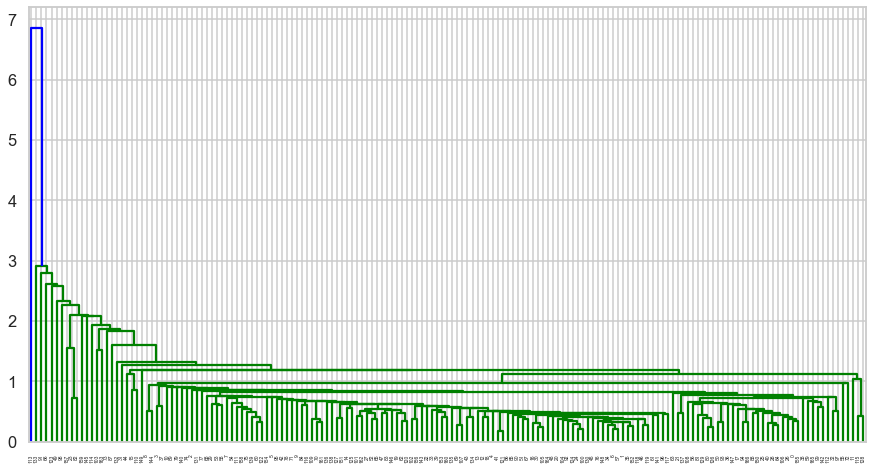

In [47]:
plt.figure(figsize=(15,8))
df_single = linkage(df, method="single", metric='euclidean')
dendrogram(df_single)
plt.show()

### As the clusters are not forming correctly , we will not use this approach for clustering.Now Lets try using complete linkage

### Complete Linkage

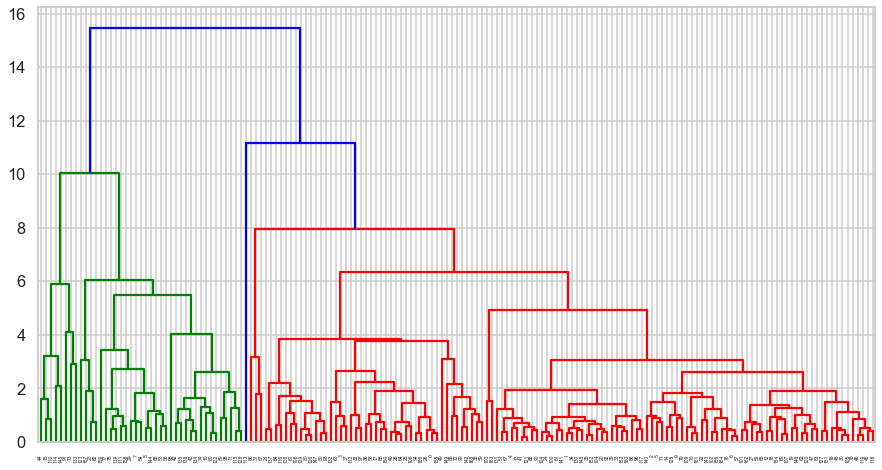

In [48]:
plt.figure(figsize=(15,8))
df_complete = linkage(df, method="complete", metric='euclidean')
dendrogram(df_complete)
plt.show()

#### As Single Linkage is not interpretable and complete linkage looks more clear, let us use complete linkage model

### Looking at dendrogram of hierarchical clustering there seem to be 3 clusters.

In [49]:
cluster_labels = cut_tree(df_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [50]:
df_hm = pd.concat([country_data, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [51]:
#value counts for different clusters
df_hm['cluster_labels'].value_counts()

0    125
1     41
2      1
Name: cluster_labels, dtype: int64

### Hierarchial Clstering Visualisation

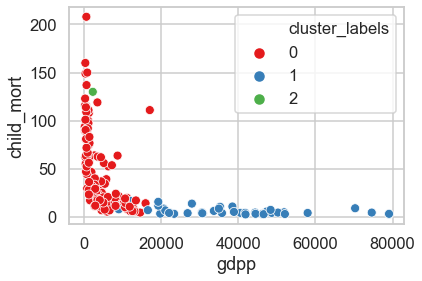

In [52]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

From the above plot, we can see that the low gdpp[0-20000] and child mortality ranging between [0-200] are having cluster label as '0'

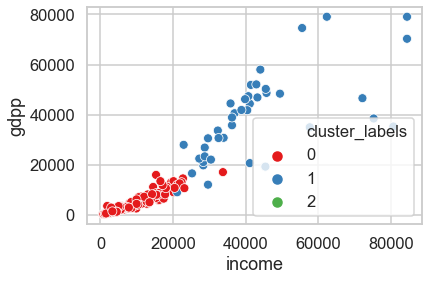

In [53]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

From the above plot, we can see that there is low income and low gdpp for cluster label 0

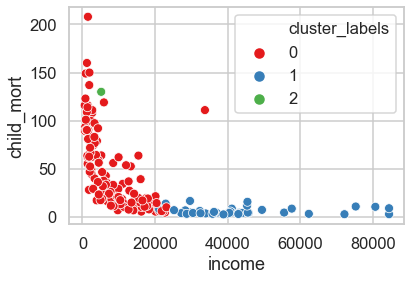

In [54]:
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

From the above plot, we can see that the low income and high mortality rate are having cluster label as '0'

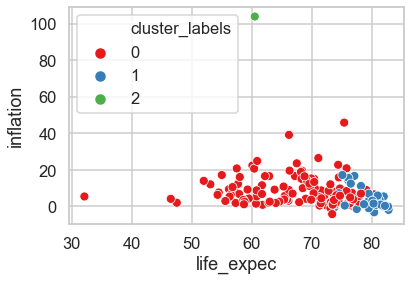

In [55]:
sns.scatterplot(x = 'life_expec', y = 'inflation', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

From the above plot, we can see that the inflation below 20 and high life expectancy belongs to cluster '1'

## Cluster Profiling

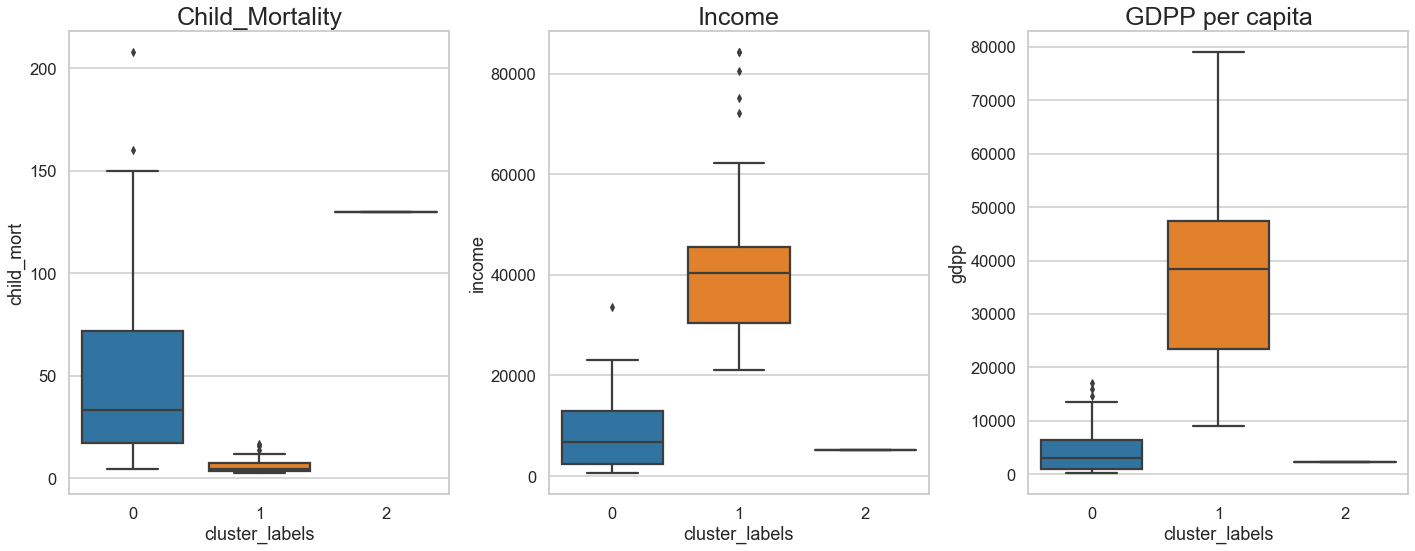

In [56]:
#plotting the clusters for Child mortality,Income and GDPP to understand cluster profiling
plt.figure(figsize=(20,8))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Visualising with boxplot for child_mort, income and gdpp variables 
plt.subplot(1,3,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot
sns.boxplot(x=df_hm['cluster_labels'],y=df_hm['child_mort'],data=df_hm,orient='v',fliersize=5)
plt.subplot(1,3,2)                        
plt.title('Income',fontsize=25)            

# creating boxplot
sns.boxplot(x=df_hm['cluster_labels'],y=df_hm['income'],data=df_hm,orient='v',fliersize=5)
plt.subplot(1,3,3)                           
plt.title('GDPP per capita',fontsize=25)     

# creating boxplot
sns.boxplot(x=df_hm['cluster_labels'],y=df_hm['gdpp'],data=df_hm,orient='v',fliersize=5)
plt.tight_layout()                      # setting the layout for better visual

### From above three plots, we can see that Label 0 has low income and gdpp and high child mortality rate compared to other labels

In [57]:
#Lets find all the counties belonging to cluster label as 0
df_hm[df_hm['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 125, dtype: object

In [58]:
#Get the top 10 countries with label 0 who has low gdpp and income and high child_mortality
top_countries_hm=df_hm.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(10)

In [59]:
top_countries_hm['country']

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [60]:
#Top 10 countries using Kmeans clustering
top_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


In [61]:
#Top 10 countries using Hierarchial clustering
top_countries_hm

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


 ### Conclusion

K-Means vs Hierarchical Clustering

<b>K-means clustering :</b>

Countries that are direst need of aid
Total 48 countries are in this category

<b>Hierarchical clustering :</b>

Countries that are direst need of aid
Total 125 countries are in this category

The top 10 countries derived are same by both Hierarchial and KMeans clustering.Below are the list of countries:

- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Eritrea


Although, both the clustering methods gave top 10 countries as same, through K-Means clustering better clusters division is done when compared to Hierarchical clustering as shown below. Hence, K-Means clustering gave precise information than Hierarchical clustering.